# Visualizing Data with Pandas and Matplotlib

## Setup

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
fb = pd.read_csv('data/fb_stock_prices_2018.csv',
                index_col='date',
                parse_dates=True)
fb.head(3)

,open,high,low,close,volume
date,,,,,
2018-01-02,177.68,181.58,177.5500,181.42,18151903
2018-01-03,181.88,184.78,181.3300,184.67,16886563
2018-01-04,184.90,186.21,184.0996,184.33,13880896


## Plotting lines

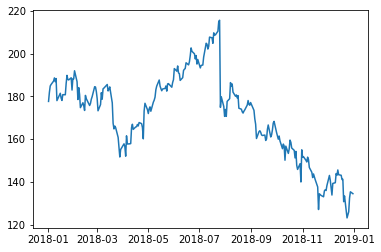

In [5]:
plt.plot(fb.index, fb.open)
plt.show()

Since we are working in a Jupyter notebook, we can use the magic command `%matplotlib inline` once and not have to call `plt.show()` for each plot.

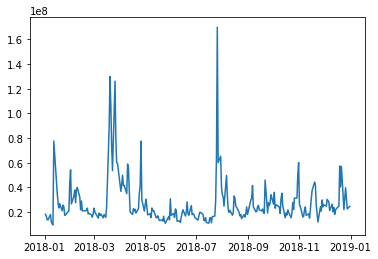

In [6]:
plt.plot(fb.index, fb.volume)

## Scatter plots

We can pass in a string specifying the style of the plot. This is of the form `[marker][linestyle][color]`. For example, we can make a black dashed line with `'--k'` or a red scatter plot with `'or'`.

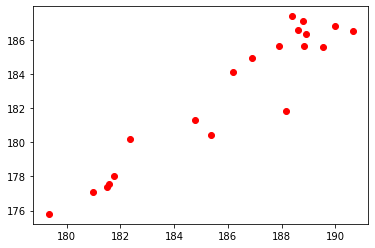

In [7]:
# 'or' - o is for circles and r is for the color red
plt.plot('high', 'low', 'or', data=fb.head(20))

Here are some examples of how you make a format string:

| Marker | Linestyle | Color | Format String | Result |
| :---: | :---: | :---: | :---: | --- |
| | `-` | `b` | `-b` | blue solid line|
| `.` |  | `k` | `.k` | black points|
|  | `--` | `r` | `--r` | red dashed line|
| `o` | `-` | `g` | `o-g` | green solid line with circles|
| | `:` | `m` | `:m` | magenta dotted line|
|`x` | `-.` | `c` | `x-.c` | cyan dot-dashed line with x's|
 
Note that we can also use format strings of the form `[color][marker][linestyle]`, but the parsing by `matplotlib` (in rare cases) might not be what we were aiming for. Consult the *Notes* section in the [documentation](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html) for the complete list of options.
## Histograms

(array([6.400e+01, 4.450e+02, 1.137e+03, 1.853e+03, 2.114e+03, 8.070e+02,
        2.800e+02, 9.200e+01, 9.000e+00, 2.000e+00]),
 array([-1.26 , -0.624,  0.012,  0.648,  1.284,  1.92 ,  2.556,  3.192,
         3.828,  4.464,  5.1  ]),
 <BarContainer object of 10 artists>)

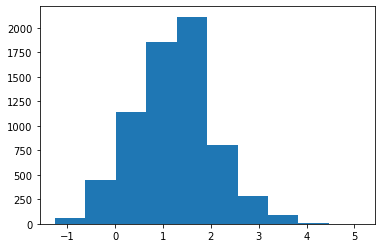

In [8]:
quakes = pd.read_csv('data/earthquakes.csv')
plt.hist(quakes.query('magType == "ml"').mag)

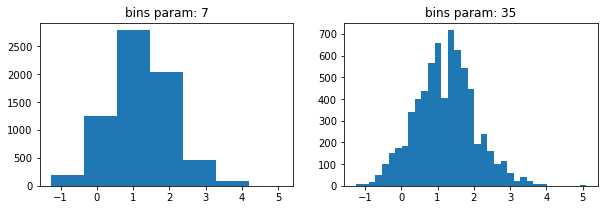

In [9]:
x = quakes.query('magType == "ml"').mag
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
for ax, bins in zip(axes, [7, 35]):
    ax.hist(x, bins=bins)
    ax.set_title(f'bins param: {bins}')

As an alternative to using `plt.subplots()` we can add `Axes` objects to the `Figure` object on our own. This allows for some more complex layouts, such as picture in picture:

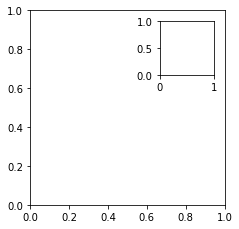

In [10]:
fig = plt.figure(figsize=(3, 3))
outside = fig.add_axes([0.1, 0.1, 0.9, 0.9])
inside = fig.add_axes([0.7, 0.7, 0.25, 0.25])

## Creating Plot Layouts with `gridspec`
We can create subplots with varying sizes as well:

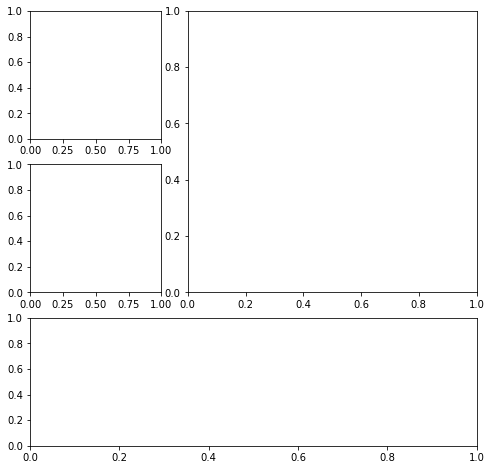

In [11]:
fig = plt.figure(figsize=(8, 8))
gs = fig.add_gridspec(3, 3)
top_left = fig.add_subplot(gs[0, 0])
mid_left = fig.add_subplot(gs[1, 0])
top_right = fig.add_subplot(gs[:2, 1:])
bottom = fig.add_subplot(gs[2, :])

In [12]:
fig.savefig('empty.png')

## Cleaning up
It's important to close resources when we are done with them. We use `plt.close()` to do so. If we pass in nothing, it will close the last plot, but we can pass in the specific `Figure` object to close or say `'all'` to close all `Figure` objects that are open. Let's close all the `Figure` objects that are open with `plt.close()`:

In [11]:
plt.close('all')

### `rcParams`
A small subset of all the available plot settings (shuffling to get a good variation of options):

In [12]:
import random
import matplotlib as mpl

rcparams_list = list(mpl.rcParams.keys())
random.seed(20) # make this repeatable
random.shuffle(rcparams_list)
sorted(rcparams_list[:20])

['animation.bitrate',
 'animation.writer',
 'axes.formatter.limits',
 'axes.prop_cycle',
 'boxplot.meanprops.markersize',
 'boxplot.showfliers',
 'image.origin',
 'keymap.quit',
 'lines.dashed_pattern',
 'mathtext.tt',
 'patch.linewidth',
 'pdf.use14corefonts',
 'ps.useafm',
 'text.kerning_factor',
 'webagg.address',
 'xtick.bottom',
 'xtick.top',
 'ytick.color',
 'ytick.major.left',
 'ytick.minor.width']

We can check the current default `figsize` using `rcParams`:

In [13]:
mpl.rcParams['figure.figsize']

[6.0, 4.0]

We can also update this value to change the default (until the kernel is restarted):

In [14]:
mpl.rcParams['figure.figsize'] = (300, 10)
mpl.rcParams['figure.figsize']

[300.0, 10.0]

Use `rcdefaults()` to restore the defaults. Note this is slightly different than before because running `%matplotlib inline` sets a different value for `figsize` ([see more](https://github.com/ipython/ipykernel/blob/master/ipykernel/pylab/config.py#L42-L56)). After we reset, we are going back to the default value of `figsize` before that import:

In [15]:
mpl.rcdefaults()
mpl.rcParams['figure.figsize']

[6.4, 4.8]

This can also be done via `pyplot`:

In [16]:
plt.rc('figure', figsize=(20, 20)) # change `figsize` default to (20, 20)
plt.rcdefaults() # reset the default

In [48]:
mpl.rcParams['figure.figsize']

[6.4, 4.8]

# Plotting with Pandas

The `plot()` method is available on `Series` and `DataFrame` objects. Many of the parameters get passed down to `matplotlib`. The `kind` argument let's us vary the plot type. Here are some commonly used parameters:

| Parameter | Purpose | Data Type |
| --- | --- | --- |
| `kind` | Determines the plot type | String |
| `x`/`y` | Column(s) to plot on the *x*-axis/*y*-axis | String or list |
| `ax` | Draws the plot on the `Axes` object provided | `Axes` |
| `subplots` | Determines whether to make subplots | Boolean |
| `layout` | Specifies how to arrange the subplots | Tuple of `(rows, columns)` |
| `figsize` | Size to make the `Figure` object | Tuple of `(width, height)` | 
| `title` | The title of the plot or subplots | String for the plot title or a list of strings for subplot titles |
| `legend` | Determines whether to show the legend | Boolean |
| `label` | What to call an item in the legend | String if a single column is being plotted; otherwise, a list of strings |
| `style` | `matplotlib` style strings for each item being plotted | String if a single column is being plotted; otherwise, a list of strings |
| `color` | The color to plot the item in | String or red, green, blue tuple if a single column is being plotted; otherwise, a list |
| `colormap` | The colormap to use | String or `matplotlib` colormap object |
| `logx`/`logy`/`loglog` | Determines whether to use a logarithmic scale for the *x*-axis, *y*-axis, or both | Boolean |
| `xticks`/`yticks` | Determines where to draw the ticks on the *x*-axis/*y*-axis | List of values |
| `xlim`/`ylim` | The axis limits for the *x*-axis/*y*-axis | Tuple of the form `(min, max)` |
| `rot` | The angle to write the tick labels at | Integer |
| `sharex`/`sharey` | Determines whether to have subplots share the *x*-axis/*y*-axis | Boolean |
| `fontsize` | Controls the size of the tick labels | Integer |
| `grid` | Turns on/off the grid lines | Boolean |

In [13]:
import numpy as np

In [14]:
fb = pd.read_csv('data/fb_stock_prices_2018.csv',
             index_col='date',
             parse_dates=True
             )
quakes = pd.read_csv('data/earthquakes.csv')
covid = pd.read_csv('data/covid19_cases.csv').assign(
    date=lambda x: pd.to_datetime(x.dateRep, format='%d/%m/%Y')
    ).set_index('date').replace('United_States_of_America', 'USA'
    ).sort_index()['2020-01-18':'2020-09-18']

## Evolution over time
Line plots help us see how a variable changes over time. They are the default for the `kind` argument, but we can pass `kind='line'` to be explicit in our intent:

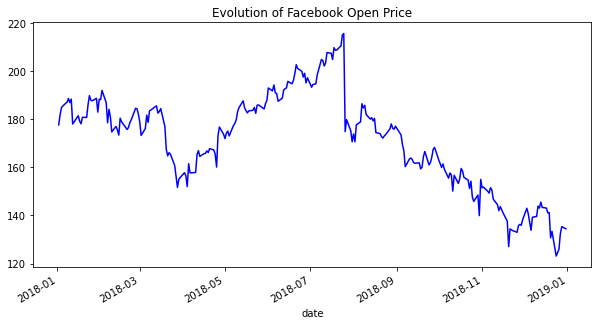

In [15]:
fb.plot(
    kind='line', 
    y='open', 
    figsize=(10, 5), 
    style='-b', 
    legend=False, 
    title='Evolution of Facebook Open Price');
    # we can pass style componenst explicitly:
    # color='blue', linestyle='solid'

We can also plot many lines at once by simply passing a list of the columns to plot:

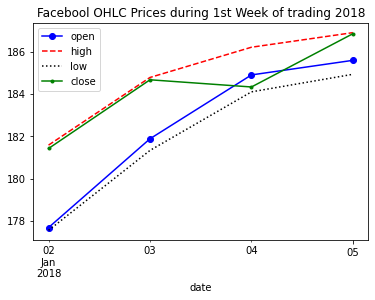

In [16]:
fb.first('1W').plot(
    y=['open', 'high', 'low', 'close'],
    style=['o-b', '--r', ':k', '.-g'],
    title='Facebool OHLC Prices during 1st Week of trading 2018'
).autoscale() # add space between data and axes

### Creating subplots
When plotting with `pandas`, creating subplots is simply a matter of passing `subplots=True` to the `plot()` method, and (optionally) specifying the `layout` in a tuple of `(rows, columns)`:

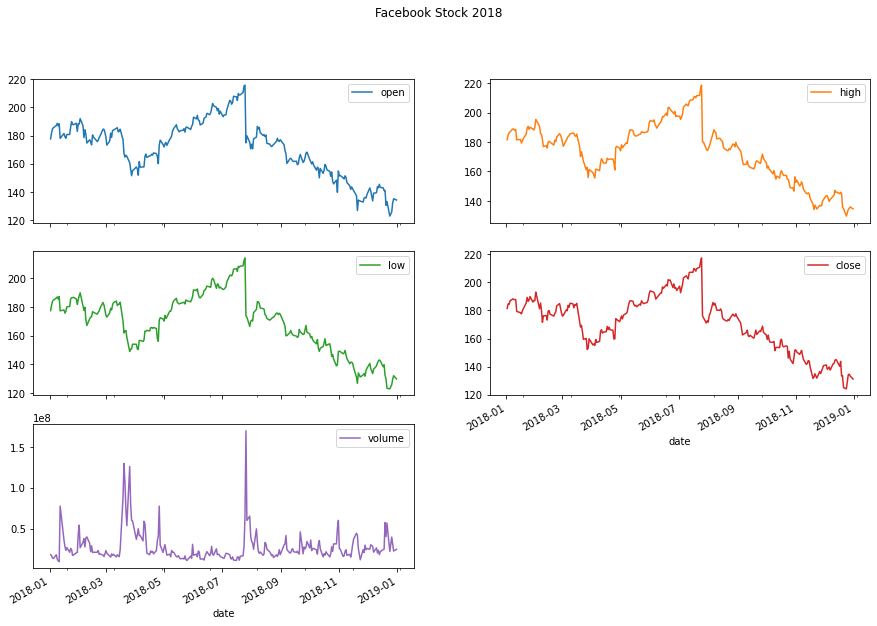

In [17]:
fb.plot(
    kind='line',
    subplots=True,
    layout=(3, 2),
    figsize=(15, 10),
    title='Facebook Stock 2018');

Note that we didn't provide a specific column to plot and pandas plotted all of them for us. 
Notice that the subplots automatically share the x-axis, since they share an index.

Sometimes we want to make subplots that each have a few variables in them for comparison. This can be achieved using the `ax` parameter. To illustrate this, let's take a look at daily new COVID-19 cases in China, Spain, Italy, the USA, Brazil, and India:

In [18]:
new_cases_rolling_average = covid.pivot_table(
    index=covid.index,
    columns='countriesAndTerritories',
    values='cases'
).rolling(7).mean()

Rather than create a separate plot for each country (which makes it harder to compare) or plot them all together (which will make it difficult to see the smaller values), we will plot countries that have had a similar number of cases in the same subplot:

<AxesSubplot:xlabel='date'>

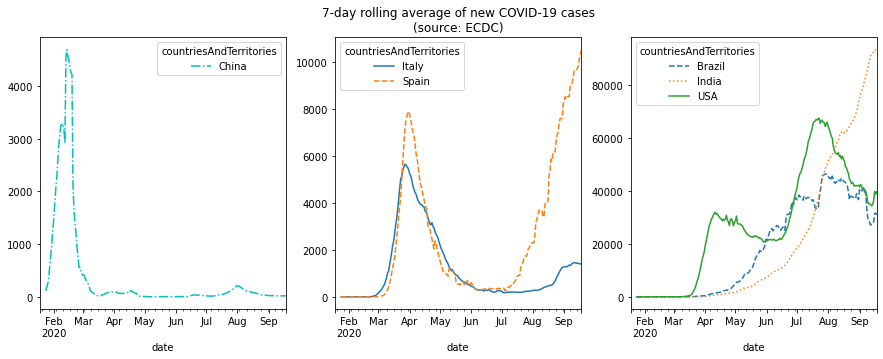

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
new_cases_rolling_average[['China']].plot(ax=axes[0], style='-.c')
new_cases_rolling_average[['Italy', 'Spain']].plot(ax=axes[1], style=['-', '--'], 
                            title='7-day rolling average of new COVID-19 cases\n(source: ECDC)')
new_cases_rolling_average[['Brazil', 'India', 'USA']].plot(ax=axes[2], style=['--', ':', '-'])

In the previous figure, we were able to compare countries with similar levels of new COVID-19 cases, but we couldn't compare all of them in the same plot due to scale. One way around this is to use an **area plot**, which makes it possible for us to visualize the overall 7-day rolling average of new COVID-19 cases and at the same time how much each country is contributing to the total. In the interest of readability, we will group Italy and Spain together and create another category for countries other than the USA, Brazil, and India. The combined height of the plot areas is the overall value, and the height of given shaded region is the value for the individual country.

**This shows us that more than half of the daily new cases are in Brazil, India, Italy, Spain, and the USA combined:**

<AxesSubplot:title={'center':'7-day rolling average of new COVID-19 cases'}, xlabel='date'>

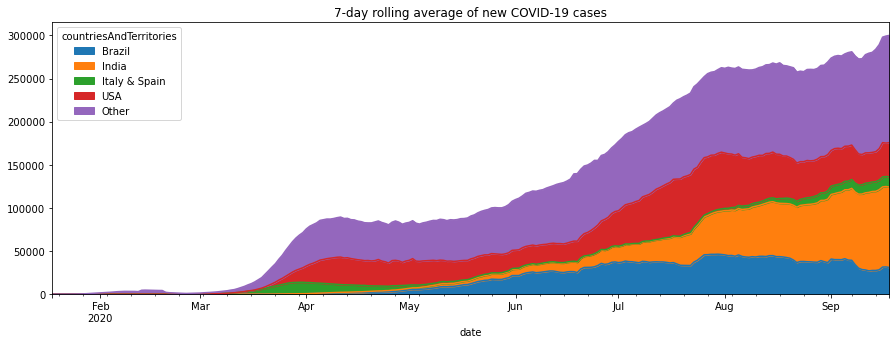

In [20]:
cols = [col for col in new_cases_rolling_average.columns
       if col not in ['USA', 'Brazil', 'India', 'Italy & Spain']]
new_cases_rolling_average.assign(**{'Italy & Spain': lambda x: x.Italy + x.Spain}
        ).sort_index(axis=1).assign(Other=lambda x: x[cols].sum(axis=1)
        ).drop(columns=cols).plot(
        kind='area', figsize=(15, 5),
        title='7-day rolling average of new COVID-19 cases')

Another way to visualize evolution over time is to look at the cumulative sum over time. Let's plot the cumulative number of COVID-19 cases in China, Spain, Italy, the USA, Brazil, and India, using `ax` to create subplots as we did in the previous example.

To calculate the cumulative sum over time, we group by the location (countriesAndTerritories) and the date, which is our index, so we use pd.Grouper(); this time, we will use groupby() and unstack() to pivot our data into wide format for the plot:

<AxesSubplot:xlabel='date'>

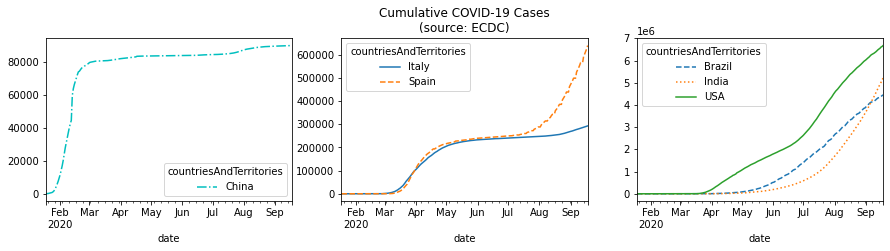

In [21]:
fig, axes = plt.subplots(1, 3, figsize=(15, 3))

cumulative_covid_cases = covid.groupby(
    ['countriesAndTerritories', pd.Grouper(freq='1D')]).cases.sum()\
    .unstack(0).apply('cumsum')

cumulative_covid_cases[['China']].plot(ax=axes[0], style='-.c')
cumulative_covid_cases[['Italy', 'Spain']].plot(ax=axes[1], style=['-', '--'],
                        title='Cumulative COVID-19 Cases\n(source: ECDC)')
cumulative_covid_cases[['Brazil', 'India', 'USA']].plot(ax=axes[2], style=['--', ':', '-'])

## Visualizing relationships between variables
### Scatter plots
We make scatter plots to help visualize the relationship between two variables. Creating scatter plots requires we pass in `kind='scatter'` along with a column for the x-axis and a column for the y-axis.

**This makes it very easy for us to spot correlations and possible non-linear relationships.**

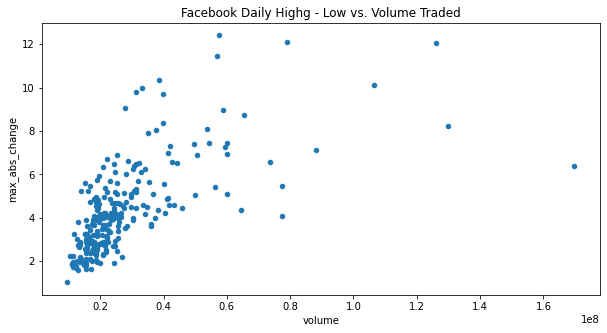

In [22]:
fb.assign(max_abs_change=fb.high - fb.low
         ).plot(
                kind='scatter',
                figsize=(10, 5),
                x='volume',
                y='max_abs_change',
                title='Facebook Daily Highg - Low vs. Volume Traded'
        );

The relationship doesn't seem to be linear, but we can try a log transform on the x-axis since the scales of the axes are very different. With `pandas`, we simply pass in `logx=True`:

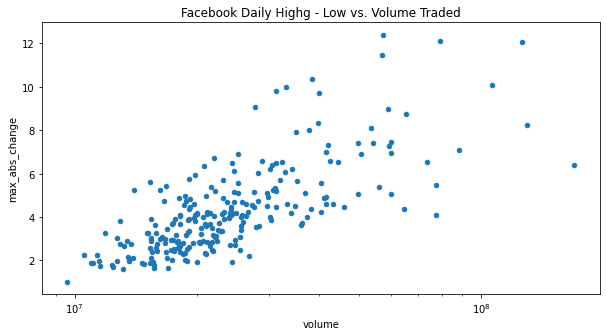

In [23]:
fb.assign(max_abs_change=fb.high - fb.low
         ).plot(
                kind='scatter',
                figsize=(10, 5),
                x='volume',
                y='max_abs_change',
                title='Facebook Daily Highg - Low vs. Volume Traded',
                logx=True
        );

### Adding Transparency to Plots with `alpha`
Sometimes our plots have many overlapping values, but this can be impossible to see. This can be addressed by increasing the transparency of what we are plotting using the `alpha` parameter. It is a float in the range [0, 1] where 0 is completely transparent and 1 is completely opaque. By default this is 1, so let's put in a lower value and re-plot the scatter plot:

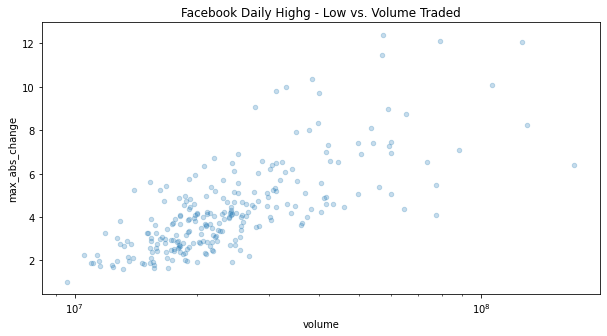

In [24]:
fb.assign(max_abs_change=fb.high - fb.low
         ).plot(
                kind='scatter',
                figsize=(10, 5),
                x='volume',
                y='max_abs_change',
                title='Facebook Daily Highg - Low vs. Volume Traded',
                logx=True,
                alpha=0.25
        );

### Hexbins
In the previous example, we can start to see the overlaps, but it is still difficult. Hexbins are another plot type that divide up the plot into hexagons, which are shaded according to the density of points there. With `pandas`, this is the `hexbin` value for the `kind` argument. It may also be necessary to tweak the `gridsize`, which determines the number of hexagons along the y-axis:

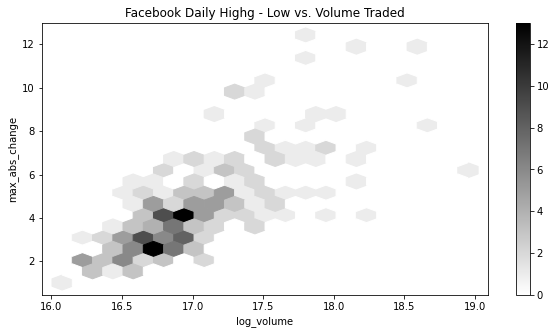

In [25]:
fb.assign(
        log_volume=np.log(fb.volume),  
        max_abs_change=fb.high - fb.low
         ).plot(
                kind='hexbin',
                figsize=(10, 5),
                x='log_volume',
                y='max_abs_change',
                title='Facebook Daily Highg - Low vs. Volume Traded',
                colormap='gray_r',
                gridsize=20,
                sharex=False # bug fix to keep the x-axis label
        );

### Visualizing Correlations with Heatmaps
Pandas doesn't offer heatmaps; however, if we are able to get our data into a matrix, we can use `matshow()` from matplotlib:

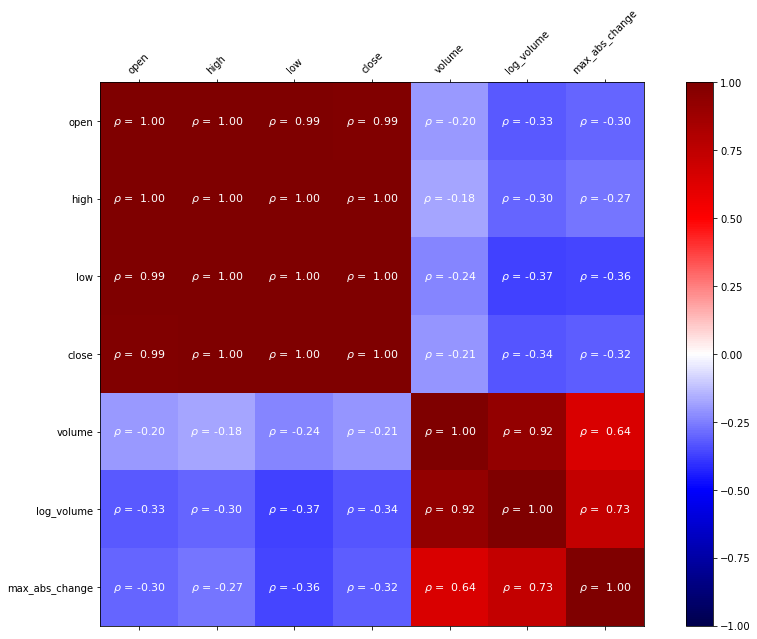

In [26]:
fig, ax = plt.subplots(figsize=(15, 10))

# calculate the correlation matrix
fb_corr = fb.assign(
        log_volume=np.log(fb.volume),
        max_abs_change=fb.high - fb.low).corr()

# create the heatmap and colorbar
im = ax.matshow(fb_corr, cmap='seismic')
im.set_clim(-1, 1)
fig.colorbar(im)

# label the ticks with the column names
labels = [col.lower() for col in fb_corr.columns]
ax.set_xticks(ax.get_xticks()[1:-1])
ax.set_xticklabels(labels, rotation=45)
ax.set_yticks(ax.get_yticks()[1:-1])
ax.set_yticklabels(labels)

# include the value of the correlation coefficient in the boxes
for (i, j), coef in np.ndenumerate(fb_corr):
    ax.text(
        i, j, fr'$\rho$ = {coef: .2f}',
        ha='center', va='center',
        color='white', fontsize=11)

## Visualizing distributions
### Histograms
Depending on the type of data we have, we may choose to use histograms, **kernel density estimates (KDEs)**, **box plots**, or **empirical cumulative distribution functions (ECDFs)**.
When working with discrete data, histograms are a good place to start.
With the `pandas`, making histograms is as easy as passing `kind='hist'` to the `plot()` method:

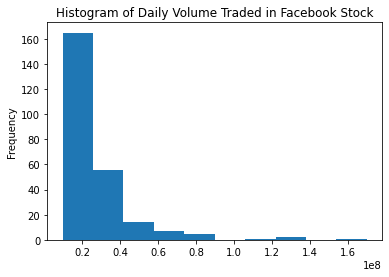

In [27]:
fb.volume.plot(
    kind='hist',
    title='Histogram of Daily Volume Traded in Facebook Stock');

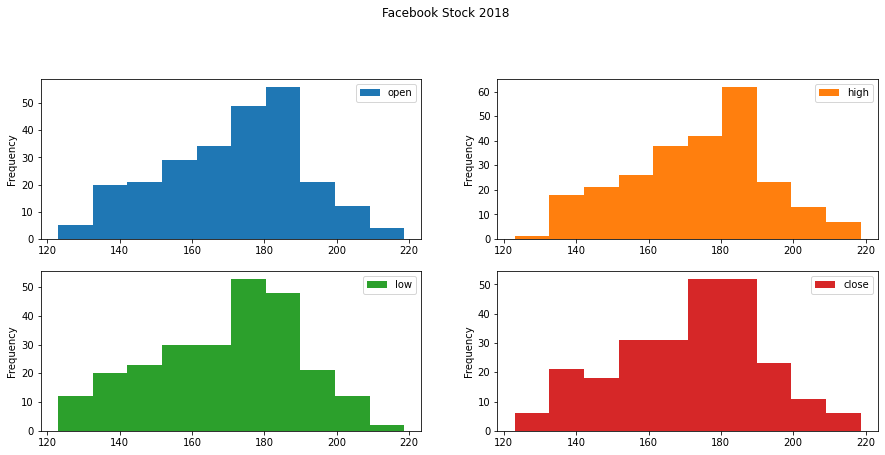

In [28]:
fb.drop(['volume'], axis=1).plot(kind='hist', 
        subplots=True, 
        layout=(3, 2),
        figsize=(15, 10),
        sharex=False,
        title='Facebook Stock 2018'
);

We can overlap histograms to compare distributions provided we use the `alpha` parameter. For example, let's compare the usage and magnitude of the various measurement techniques (the `magType` column) in the data:

Text(0.5, 0, 'magnitude')

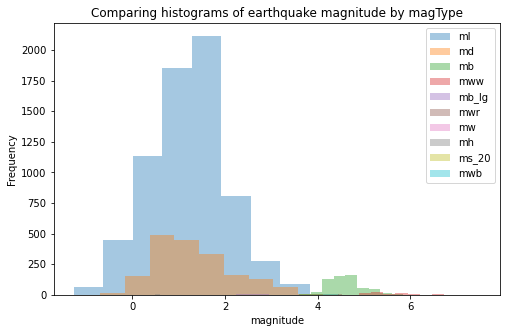

In [29]:
fig, axes = plt.subplots(figsize=(8, 5))

for magtype in quakes.magType.unique():
    data = quakes.query(f'magType == "{magtype}"').mag
    if not data.empty:
        data.plot(
            kind='hist',
            ax=axes,
            alpha=0.4,
            label=magtype,
            legend=True,
            title='Comparing histograms of earthquake magnitude by magType'
        )
plt.xlabel('magnitude')

### Kernel Density Estimation (KDE)
When working with **continuous data** (such as stock prices), we can use KDEs. We can pass `kind='kde'` for an estimate of the probability density function (PDF), which tells us the probability of getting a particular value:

Text(0.5, 0, 'Price ($)')

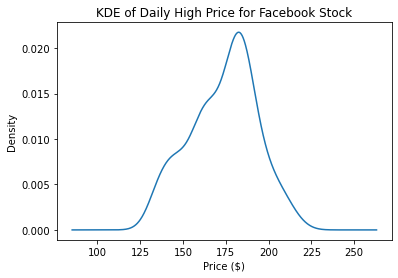

In [30]:
fb.high.plot(
    kind='kde',
    title='KDE of Daily High Price for Facebook Stock')
plt.xlabel('Price ($)')

### Adding to the result of `plot()`
The `plot()` method returns an `Axes` object. We can store this for additional customization of the plot, or we can pass this into another call to `plot()` as the `ax` argument to add to the original plot. 

It can often be helpful to view the KDE superimposed on top of the histogram, which can be achieved with this strategy:

Text(0.5, 0, 'Price ($)')

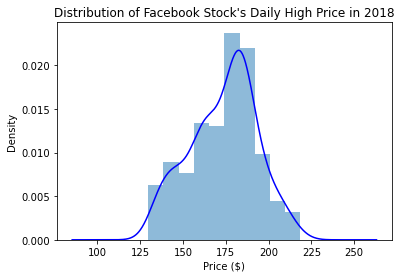

In [31]:
ax = fb.high.plot(kind='hist', density=True, alpha=0.5)
fb.high.plot(
    ax=ax, kind='kde', color='blue',
    title='Distribution of Facebook Stock\'s Daily High Price in 2018')
plt.xlabel('Price ($)')

### Plotting the ECDF
In some cases, we are more interested in the probability of getting less than or equal to that value (or greater than or equal), which we can see with the **cumulative disribution function (CDF)**. Using the `statsmodels` package, we can estimate the CDF giving us the **empirical cumulative distribution function (ECDF)**:

Text(0.5, 1.0, 'ECDF of earthquake magnitude with magType ml')

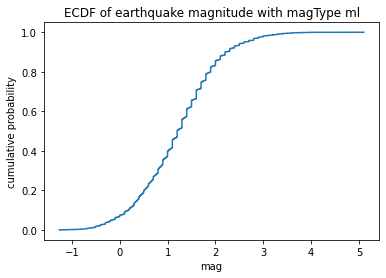

In [32]:
from statsmodels.distributions.empirical_distribution import ECDF

ecdf = ECDF(quakes.query('magType == "ml"').mag)
plt.plot(ecdf.x, ecdf.y)

# axis labels (we will cover this in chapter 6)
plt.xlabel('mag') # add x-axis label 
plt.ylabel('cumulative probability') # add y-axis label

# add title (we will cover this in chapter 6)
plt.title('ECDF of earthquake magnitude with magType ml')

This ECDF tells us the probability of getting an earthquake with magnitude of 3 or less using the `ml` scale is 98%:

Text(0.5, 1.0, 'P(mag <= 3) = 98%')

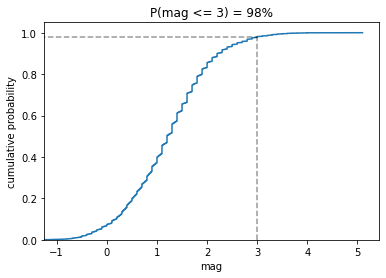

In [33]:
from statsmodels.distributions.empirical_distribution import ECDF

ecdf = ECDF(quakes.query('magType == "ml"').mag)
plt.plot(ecdf.x, ecdf.y)

# formatting below will all be covered in chapter 6
# axis labels
plt.xlabel('mag') # add x-axis label 
plt.ylabel('cumulative probability') # add y-axis label

# add reference lines for interpreting the ECDF for mag <= 3 
plt.plot(
    [3, 3], [0, .98], '--k', 
    [-1.5, 3], [0.98, 0.98], '--k', alpha=0.4
)

# set axis ranges
plt.ylim(0, None)
plt.xlim(-1.25, None)

# add a title
plt.title('P(mag <= 3) = 98%')

### Box plots
To make box plots with `pandas`, we pass `kind='box'` to the `plot()` method:

Text(0, 0.5, 'price ($)')

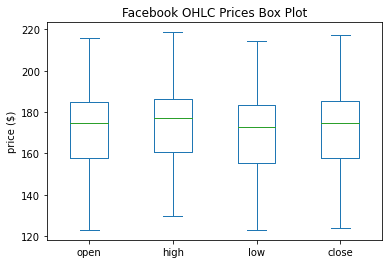

In [34]:
fb.iloc[:,:4].plot(
    kind='box',
    title='Facebook OHLC Prices Box Plot'
)
plt.ylabel('price ($)')

Text(0.5, 1.1, 'Facebook OHLC Box Plots by Volume Traded')

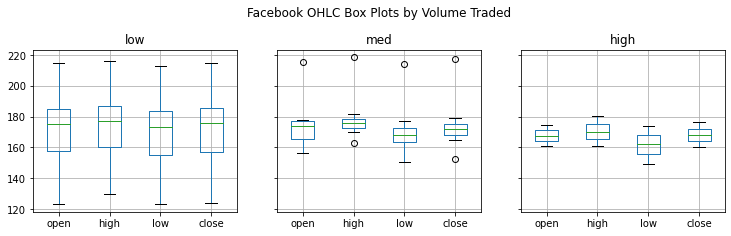

In [35]:
fb.assign(
    volume_bin=
        pd.cut(fb.volume, 3, labels=['low', 'med', 'high'])
    ).groupby('volume_bin').boxplot(
        column=['open', 'high', 'low', 'close'],
    layout=(1, 3), figsize=(12, 3)
)
plt.suptitle(
    'Facebook OHLC Box Plots by Volume Traded', y=1.1
)

We can use this to see the distribution of magnitudes across the different measurement methods for earthquakes:

Text(0, 0.5, 'magnitude')

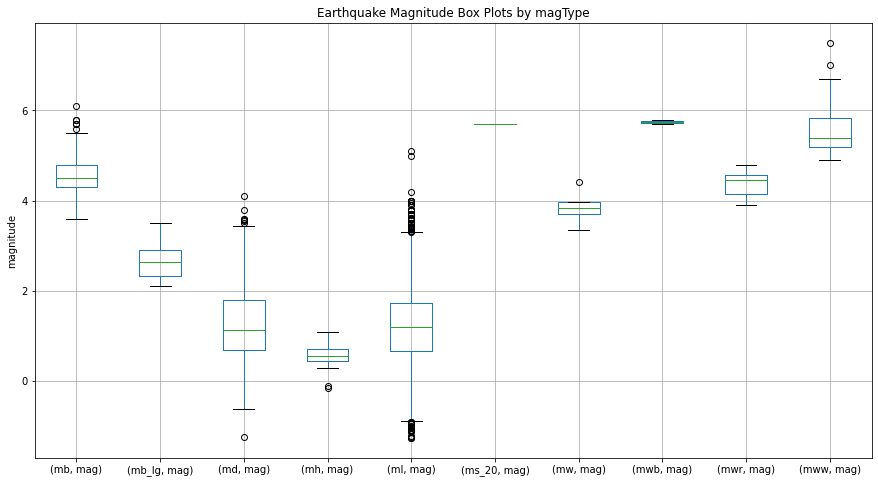

In [36]:
quakes[['mag', 'magType']].groupby('magType')\
    .boxplot(figsize=(15, 8), subplots=False)

plt.title('Earthquake Magnitude Box Plots by magType')
plt.ylabel('magnitude')

## Counts and frequencies
### Bar charts
Passing `kind='barh'` gives us horizontal bars while `kind='bar'` gives us vertical ones. Let's use horizontal bars to look at the top 15 places for earthquakes in our data:

Text(0.5, 0, 'earthquakes')

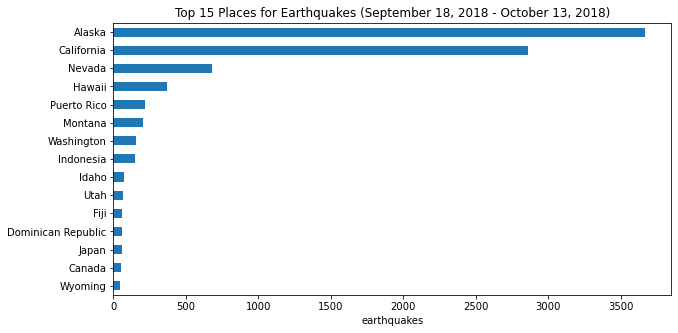

In [37]:
quakes.parsed_place.value_counts().iloc[14::-1].plot(
    kind='barh', figsize=(10, 5),
    title='Top 15 Places for Earthquakes (September 18, 2018 - October 13, 2018)'
)
plt.xlabel('earthquakes')

Text(0.5, 0, 'earthquakes')

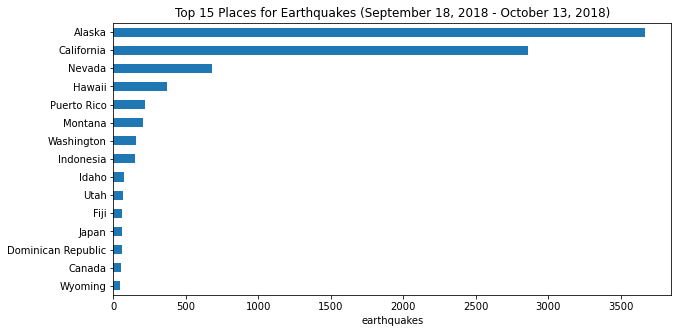

In [38]:
quakes.parsed_place.value_counts().head(15).sort_values(ascending=True).plot(
    kind='barh', figsize=(10, 5),
    title='Top 15 Places for Earthquakes (September 18, 2018 - October 13, 2018)'
)
plt.xlabel('earthquakes')

We also have data on whether earthquakes were accompanied by tsunamis. Let's see what the top places for tsunamis are:

Text(0.5, 0, 'tsunamis')

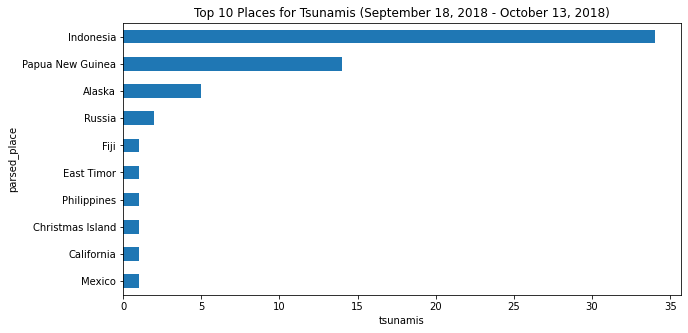

In [39]:
quakes.groupby(
    'parsed_place'
).tsunami.sum().sort_values().iloc[-10:,].plot(
    kind='barh', figsize=(10, 5),
    title='Top 10 Places for Tsunamis (September 18, 2018 - October 13, 2018)'
)
plt.xlabel('tsunamis')

Seeing that Indonesia is the top place for tsunamis during the time period we are looking at, we may want to look how many earthquakes and tsunamis Indonesia gets on a daily basis. We could show this as a line plot or with bars; since we don't want to interpolate, we will use bars here:

Text(0, 0.5, 'count')

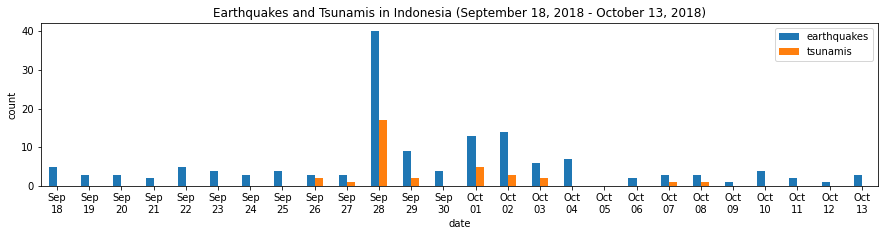

In [40]:
indonesia_quakes = quakes.query('parsed_place == "Indonesia"'
                ).assign(
                    time=lambda x: pd.to_datetime(x.time, unit='ms'),
                    earthquake=1
).set_index('time').resample('1D').sum()

# format the datetimes in the index for the x-axis
indonesia_quakes.index = indonesia_quakes.index.strftime('%b\n%d')

indonesia_quakes.plot(
    y=['earthquake', 'tsunami'], kind='bar', rot=0,
    figsize=(15, 3), label=['earthquakes', 'tsunamis'],
    title='Earthquakes and Tsunamis in Indonesia (September 18, 2018 - October 13, 2018)'
)

plt.xlabel('date')
plt.ylabel('count')

### Grouped Bars

Text(0, 0.5, '')

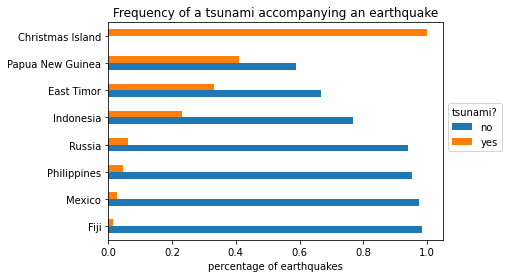

In [41]:
quakes.groupby(['parsed_place', 'tsunami']).mag.count()\
    .unstack().apply(lambda x: x / x.sum(), axis=1)\
    .rename(columns={0: 'no', 1: 'yes'})\
    .sort_values('yes', ascending=False)[7::-1]\
    .plot.barh(
        title='Frequency of a tsunami accompanying an earthquake')

# move legend to the right of the plot; label axes
plt.legend(title='tsunami?', bbox_to_anchor=(1, 0.65))
plt.xlabel('percentage of earthquakes')
plt.ylabel('')

Using the `kind` arugment for vertical bars when the labels for each bar are shorter:

Text(0, 0.5, 'earthquakes')

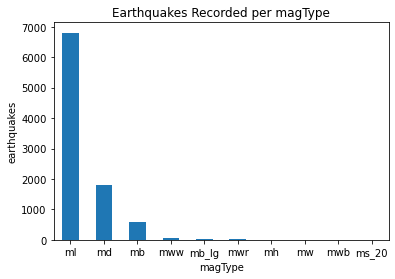

In [42]:
quakes.magType.value_counts().plot(
    kind='bar', rot=0,
    title='Earthquakes Recorded per magType')

# label the axes
plt.xlabel('magType')
plt.ylabel('earthquakes')

### Stacked bars

Text(0, 0.5, 'earthquakes')

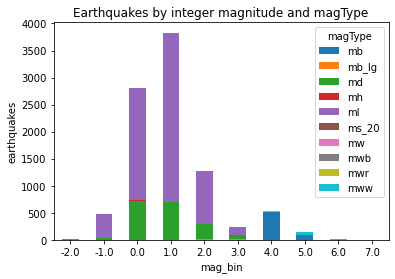

In [43]:
pivot = quakes.assign(
    mag_bin=lambda x: np.floor(x.mag)
).pivot_table(
    index='mag_bin',
    columns='magType',
    values='mag',
    aggfunc='count')

pivot.plot.bar(
    stacked=True,
    rot=0,
    title='Earthquakes by integer magnitude and magType'
)
plt.ylabel('earthquakes')

#### Normalized stacked bars
Plot the percentages to be better able to see the different `magTypes`.

Text(0, 0.5, 'percentage')

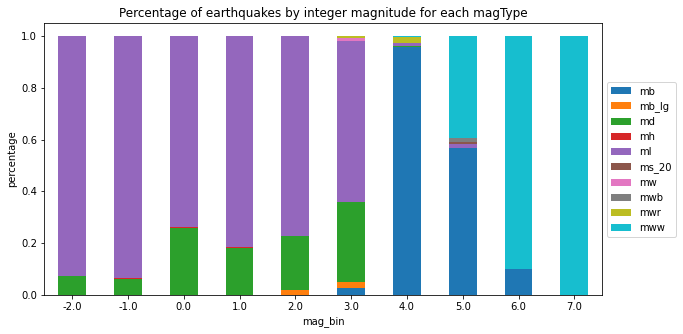

In [44]:
normalized_pivot = pivot.fillna(0).apply(lambda x: x / x.sum(), axis=1)

ax = normalized_pivot.plot.bar(
    stacked=True, rot=0, figsize=(10, 5),
    title='Percentage of earthquakes by integer magnitude for each magType')
ax.legend(bbox_to_anchor=(1, 0.8))
plt.ylabel('percentage')

We can also create horizontal stacked bars and do so using `groupby()` and `unstack()`:

Text(0, 0.5, '')

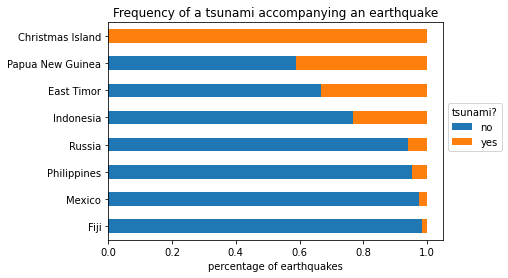

In [45]:
quakes.groupby(['parsed_place', 'tsunami']).mag.count()\
    .unstack().apply(lambda x: x / x.sum(), axis=1)\
    .rename(columns={0: 'no', 1: 'yes'})\
    .sort_values('yes', ascending=False)[7::-1]\
    .plot.barh(
        title='Frequency of a tsunami accompanying an earthquake',
        stacked=True)

# move legend to the right of the plot
plt.legend(title='tsunami?', bbox_to_anchor=(1, 0.65))

# label the axes
plt.xlabel('percentage of earthquakes')
plt.ylabel('')

# The `pandas.plotting` module
Pandas provides some extra plotting functions for some new plot types.

## Scatter matrices

Scatter matrix is often used in machine learning to see which variables could be useful in building a model.

In [46]:
from pandas.plotting import scatter_matrix

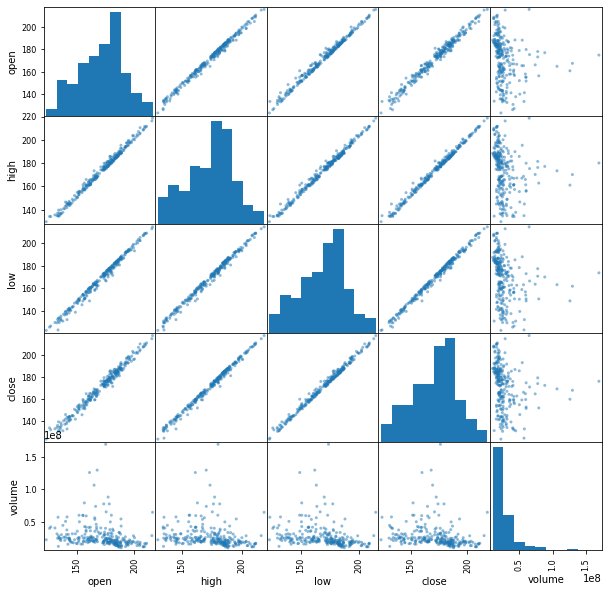

In [47]:
scatter_matrix(fb, figsize=(10, 10));

Changing the diagonal from histograms to KDE:

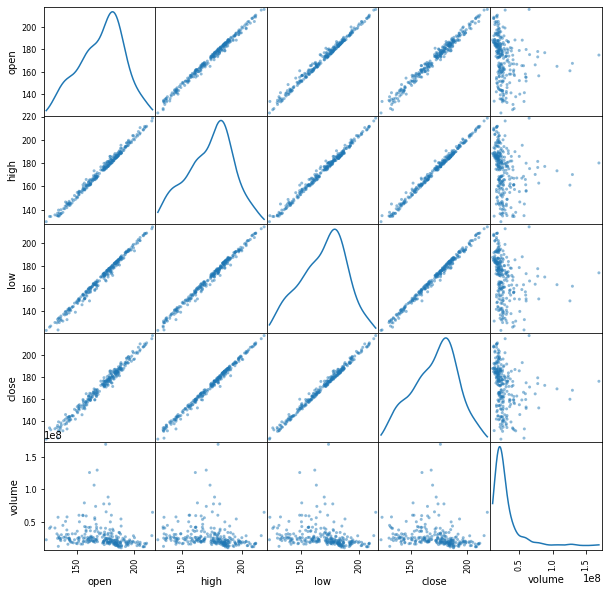

In [48]:
scatter_matrix(fb, figsize=(10, 10), diagonal='kde');

## Lag plot
Lag plots let us see how the variable correlates with past observations of itself. Random data has no pattern:

In [49]:
from pandas.plotting import lag_plot

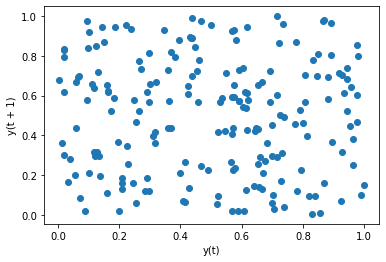

In [50]:
np.random.seed(0)
lag_plot(pd.Series(np.random.random(size=200)));

Data with some level of correlation to itself (autocorrelation) may have patterns. Stock prices are highly autocorrelated:

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

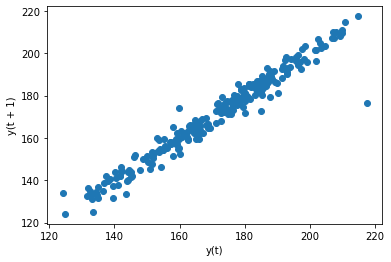

In [51]:
lag_plot(fb.close)

The default lag is 1, but we can alter this with the `lag` parameter. Let's look at a 5 day lag (a week of trading activity). For example, we can compare each value to the value of the week prior with lag=5 (remember that the stock data only contains data for weekdays since the market is closed on the weekends):

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 5)'>

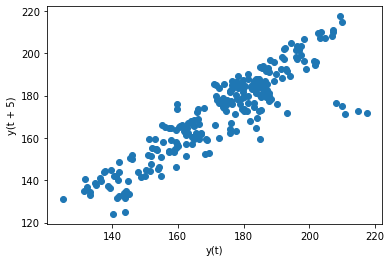

In [52]:
lag_plot(fb.close, lag=5)

## Autocorrelation plots
We can use the autocorrelation plot to see if this relationship may be meaningful or is just noise. Random data will not have any significant autocorrelation (it stays within the bounds below):

In [53]:
from pandas.plotting import autocorrelation_plot

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

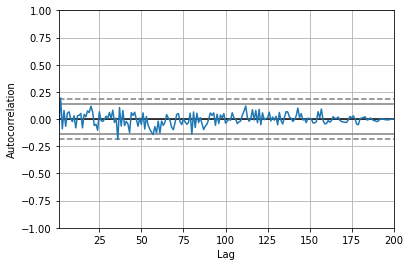

In [54]:
np.random.seed(0)
autocorrelation_plot(pd.Series(np.random.random(size=200)))

Stock data, on the other hand, does have significant autocorrelation:

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

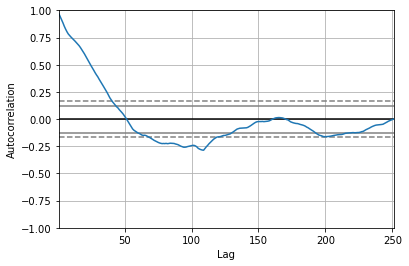

In [55]:
autocorrelation_plot(fb.close)

## Bootstrap plot
This plot helps us understand the uncertainty in our summary statistics:

In [56]:
from pandas.plotting import bootstrap_plot

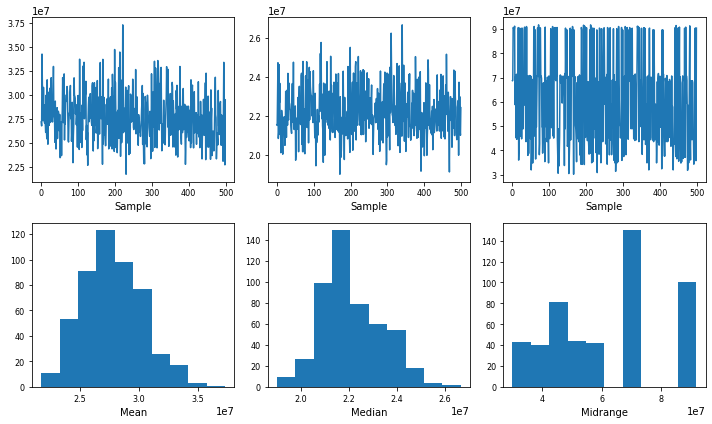

In [57]:
fig = bootstrap_plot(
    fb.volume, fig=plt.figure(figsize=(10, 6)))

# Exercises

## Exercise 1
Plot the rolling 20-day minimum of the Facebook closing price with the `pandas` method.

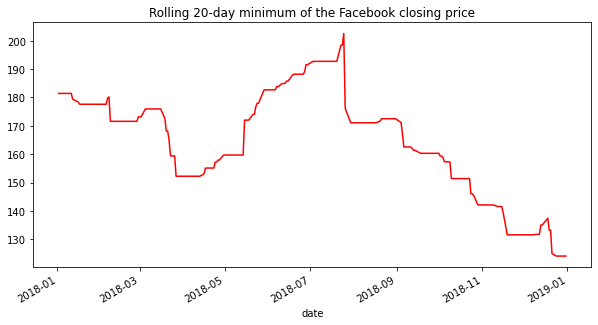

In [58]:
fb.assign(
    rolling_min=lambda x: x.close\
    .rolling('20D').min()
).plot(
    kind='line', 
    y='rolling_min', 
    figsize=(10, 5), 
    style='-r', 
    legend=False, 
    title='Rolling 20-day minimum of the Facebook closing price');

<AxesSubplot:title={'center':'Rolling 20D Minimum Closing Price of Facebook Stock'}, xlabel='date'>

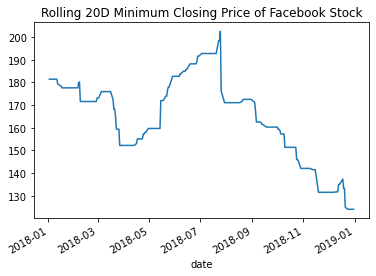

In [59]:
# solution from the book
fb.close.rolling('20D').min().plot(
    title='Rolling 20D Minimum Closing Price of Facebook Stock'
)

## Exercise 2
Create a histogram and KDE of the change from open to close in the price of Facebook stock.

<AxesSubplot:title={'center':'Change From Open To Close In the Price of Facebook Stock'}, ylabel='Density'>

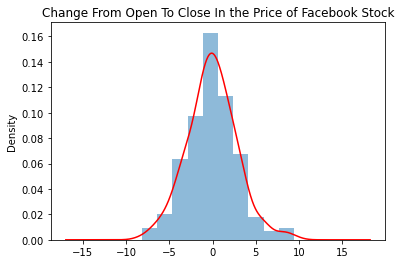

In [60]:
fb = fb.assign(change=lambda x: x.open - x.close)
ax = fb.change.plot(kind='hist', density=True, alpha=0.5)
fb.change.plot(
    ax=ax, kind='kde', color='red',
    title='Change From Open To Close In the Price of Facebook Stock')

<AxesSubplot:title={'center':"Facebook Stock Price's Daily Change from Open to Close"}, ylabel='Density'>

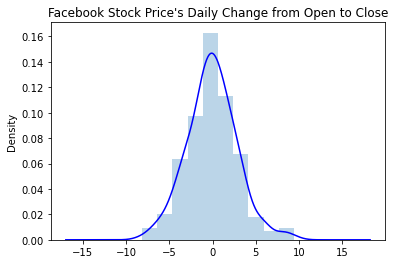

In [61]:
# solution from the book
differential = fb.open - fb.close
ax = differential.plot(kind='hist', density=True, alpha=0.3)
differential.plot(
    kind='kde', color='blue', ax=ax, 
    title='Facebook Stock Price\'s Daily Change from Open to Close'
)

## Exercise 3
Using the earthquake data, create box plots for the magnitudes of each magType used in Indonesia.

<AxesSubplot:>

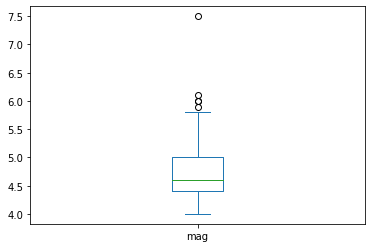

In [62]:
quakes.query(
    'parsed_place == "Indonesia"')\
    .mag.plot(
        kind='box',
        y=['magType'])

Text(0, 0.5, 'magnitude')

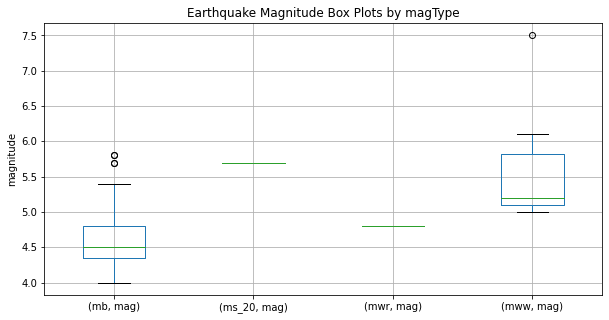

In [72]:
quakes.query(
    'parsed_place == "Indonesia"')[['mag', 'magType']]\
    .groupby('magType')\
    .boxplot(figsize=(10, 5), subplots=False)

plt.title('Earthquake Magnitude Box Plots by magType')
plt.ylabel('magnitude')

## Exercise 4
Make a line plot of the difference between the weekly maximum high price and the weekly minimum low price for Facebook. This should be a single line.

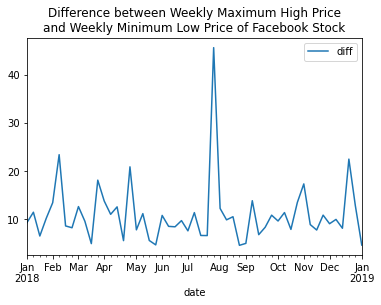

In [81]:
fb.resample('1W').agg({'high': 'max', 'low': 'min'}).assign(
    diff=lambda x: x.high - x.low).plot(
    y='diff',
    title='Difference between Weekly Maximum High Price\n'
          'and Weekly Minimum Low Price of Facebook Stock');

## Exercise 5
Plot the 14-day moving average of the daily change in new COVID-19 cases in Brazil, China, India, Italy, Spain, and the USA:
- First, use the diff() method, to calculate the day-over-day change in new cases. Then, use rolling() to calculate the 14-day moving average.
- Make three subplots: one for China; one for Spain and Italy; and one for Brazil, India, and the USA.

<AxesSubplot:xlabel='date'>

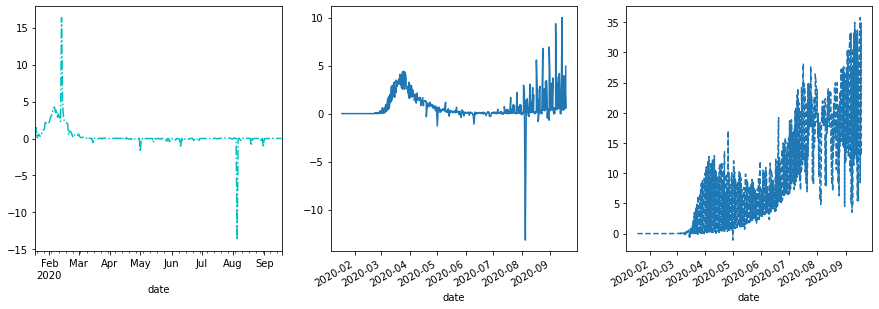

In [108]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

covid = covid.assign(
    moving_average=lambda x: x.cases.diff()\
    .rolling('14D').agg({'cases': 'mean'}))
covid.query('countriesAndTerritories == "China"')\
    .moving_average.plot(ax=axes[0], style='-.c')
covid.query('countriesAndTerritories in ["Spain", "Italy"]')\
    .moving_average.plot(ax=axes[1], style=['-', '--'])
covid.query('countriesAndTerritories in ["Brazil", "India", "USA"]')\
    .moving_average.plot(ax=axes[2], style=['--', ':', '-'])
# first we need to group data by countries, otherwise diff() is calculated throughout all countries

<AxesSubplot:xlabel='date'>

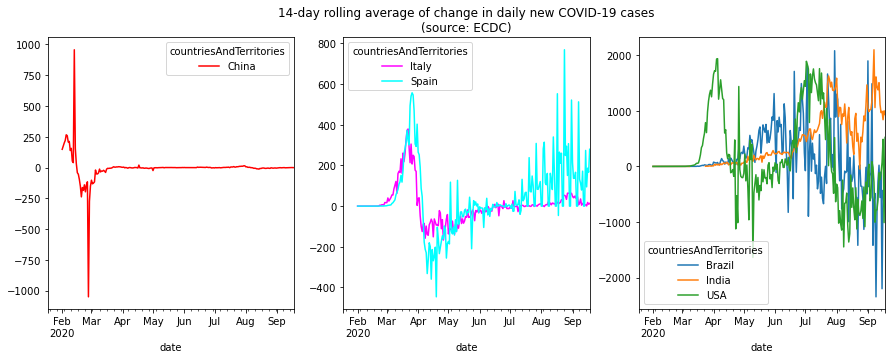

In [100]:
#solution from the book
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

new_cases_rolling_average = covid.pivot_table(
    index=covid.index, columns=['countriesAndTerritories'], values='cases'
).apply(lambda x: x.diff().rolling(14).mean())

new_cases_rolling_average[['China']].plot(ax=axes[0], color='red')
new_cases_rolling_average[['Italy', 'Spain']].plot(
    ax=axes[1], color=['magenta', 'cyan'],
    title='14-day rolling average of change in daily new COVID-19 cases\n(source: ECDC)'
)
new_cases_rolling_average[['Brazil', 'India', 'USA']].plot(ax=axes[2])

## Exercise 6

Using matplotlib and pandas, create two subplots side-by-side showing the effect that after-hours trading has had on Facebook's stock prices:
- The first subplot will contain a line plot of the daily difference between that day's opening price and the prior day's closing price.
- The second subplot will be a bar plot showing the net effect this had monthly, using resample().
- Bonus #1: Color the bars according to whether there are gains in the stock price (green) or drops in the stock price (red).
- Bonus #2: Modify the x-axis of the bar plot to show the three-letter abbreviation for the month.

<AxesSubplot:title={'center':"Daily difference between opening price and the prior day's closing price"}, xlabel='date'>

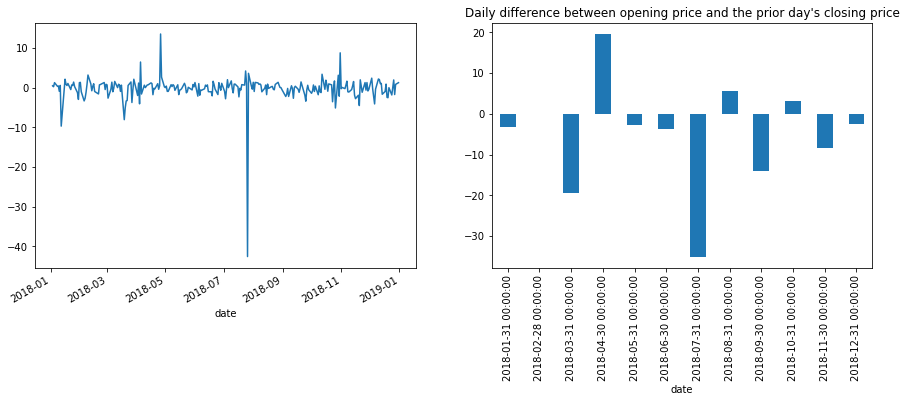

In [127]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

after_hours = fb.assign(
    prior_close=lambda x: x.close.shift(),
    after_hours=lambda x: x.open - x.prior_close)\
    .after_hours

after_hours.plot(ax=axes[0])

after_hours.resample('1M').sum()\
    .plot(
    ax=axes[1],
    kind='bar',
    title='Daily difference between opening price and the prior day\'s closing price')

<AxesSubplot:title={'center':'After hours trading monthly effect'}, xlabel='date'>

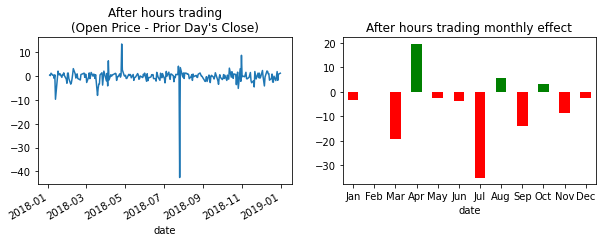

In [129]:
#solution from the book

series = (fb.open - fb.close.shift())
monthly_effect = series.resample('1M').sum()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

series.plot(
    ax=axes[0],
    title='After hours trading\n(Open Price - Prior Day\'s Close)'
)

monthly_effect.index = monthly_effect.index.strftime('%b')
monthly_effect.plot(
    ax=axes[1],
    kind='bar', 
    title='After hours trading monthly effect',
    color=np.where(monthly_effect >= 0, 'g', 'r'),
    rot=0
)